<a href="https://colab.research.google.com/github/aayushkubb/Deep_Learning_Tutorial/blob/master/CIFAR_Image_Classification_Using_Keras(Template_All_Models).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
import tensorflow as tf

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

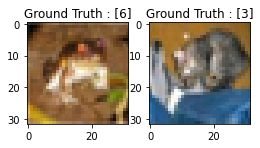

In [ ]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [ ]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels)

https://github.com/spmallick/learnopencv/blob/master/KerasCNN-CIFAR/keras-cnn-cifar10.ipynb

In [ ]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [ ]:
model1 = createModel()
batch_size = 256
epochs = 5
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

[1.1005927324295044, 0.6055999994277954]

Text(0.5, 1.0, 'Loss Curves')

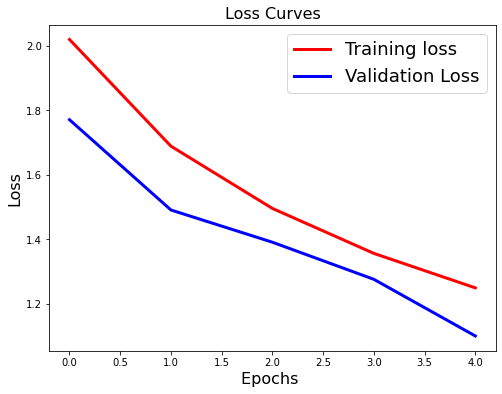

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

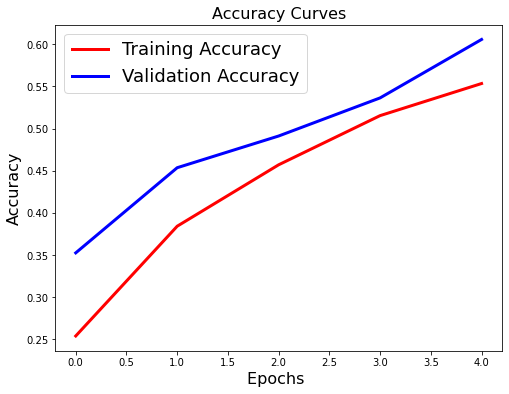

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

model2 = createModel()

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 256
epochs = 5
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


# datagen.fit(train_data)

# Fit the model on the batches generated by datagen.flow().
history2 = model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),
                              workers=4)

model2.evaluate(test_data, test_labels_one_hot)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
196/196 [==============================] - 28s 135ms/step - loss: 2.1951 - accuracy: 0.1727 - val_loss: 1.7756 - val_accuracy: 0.3512
Epoch 2/5
196/196 [==============================] - 27s 133ms/step - loss: 1.8313 - accuracy: 0.3313 - val_loss: 1.5027 - val_accuracy: 0.4411
Epoch 3/5
196/196 [==============================] - 26s 132ms/step - loss: 1.6167 - accuracy: 0.4112 - val_loss: 1.5406 - val_accuracy: 0.4388
Epoch 4/5
196/196 [==============================] - 26s 132ms/step - loss: 1.4911 - accuracy: 0.4626 - val_loss: 1.2577 - val_accuracy: 0.5492
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.2760 - accuracy: 0.5408


[1.2760282754898071, 0.5407999753952026]

Text(0.5, 1.0, 'Loss Curves')

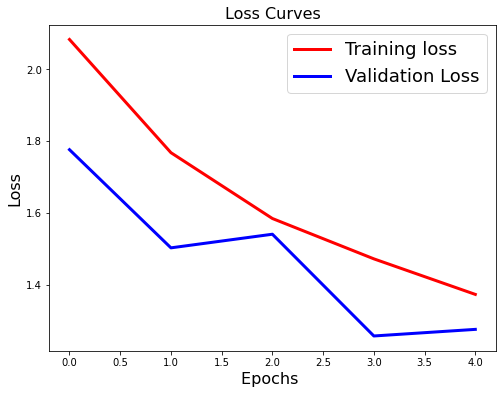

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

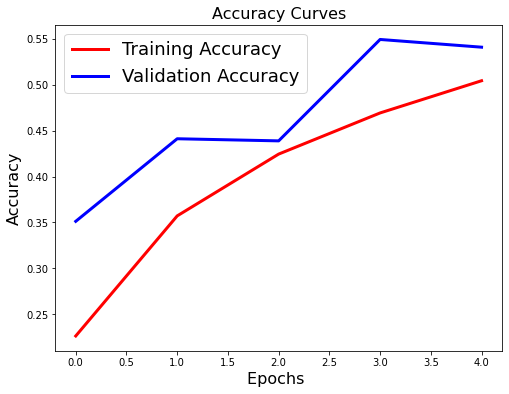

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=3.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Transfer Learning using Resnet50 model

In [ ]:
# batch, classes, epochs
batch_size =64
num_classes = 10
epochs = 10

# plotting some random 10 images
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


In [ ]:
## Transfer Learning using Resnet50 model

from keras.models import Model, load_model
# from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dropout

# Number of classes in dataset
num_classes = len(class_names)

def get_model():
    # Get base model 
    # Here we are using ResNet50 as base model
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)
    
    # As we are using ResNet model only for feature extraction and not adjusting the weights
    # we freeze the layers in base model
    for layer in base_model.layers:
        layer.trainable = False
        
    # Get base model output 
    base_model_ouput = base_model.output
    
    # Adding our own layer 
    x = GlobalAveragePooling2D()(base_model_ouput)
    # Adding fully connected layer
    x = Dense(2056, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax', name='fcnew')(x)
    
    model = Model(inputs=base_model.input, outputs=x)
    return model

# Get the model
model = get_model()
# Compile it
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Summary of model
model.summary()

94773248/94765736 [==============================] - 1s 0us/step


TypeError: ignored

In [ ]:
# Training the model
history = model.fit(train_data, train_labels_one_hot,
              batch_size=batch_size,
              epochs=5,
              validation_data=(test_data, test_labels_one_hot),
              shuffle=True)

Epoch 1/5
782/782 [==============================] - 18s 20ms/step - loss: 2.6097 - accuracy: 0.1326 - val_loss: 2.3103 - val_accuracy: 0.1230
Epoch 2/5
782/782 [==============================] - 14s 18ms/step - loss: 2.1905 - accuracy: 0.1826 - val_loss: 2.1652 - val_accuracy: 0.1622
Epoch 3/5
782/782 [==============================] - 14s 17ms/step - loss: 2.1399 - accuracy: 0.2071 - val_loss: 2.1272 - val_accuracy: 0.1909
Epoch 4/5
782/782 [==============================] - 14s 17ms/step - loss: 2.1114 - accuracy: 0.2213 - val_loss: 2.1741 - val_accuracy: 0.1655
Epoch 5/5
782/782 [==============================] - 14s 17ms/step - loss: 2.0836 - accuracy: 0.2313 - val_loss: 2.1263 - val_accuracy: 0.2210


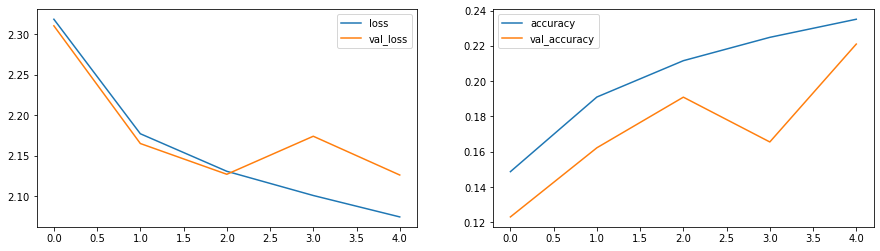

In [ ]:
def plot(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    axes[0].plot(history.history['loss'])   
    axes[0].plot(history.history['val_loss'])
    axes[0].legend(['loss','val_loss'])

    axes[1].plot(history.history['accuracy'])   
    axes[1].plot(history.history['val_accuracy'])
    axes[1].legend(['accuracy','val_accuracy'])

plot(history)

## Train with VGG16 model now

In [ ]:
from keras.models import Model, load_model
from keras.applications import ResNet50,VGG16
from keras.applications.resnet50 import preprocess_input
from keras.layers import GlobalAveragePooling2D,BatchNormalization,Dropout
import tensorflow as tf

# Number of classes in dataset
num_classes = len(class_names)

def get_model():
    # Get base model 
    # Here we are using ResNet50 as base model
    base_model = VGG16(weights='imagenet', include_top=False)
    
    # As we are using ResNet model only for feature extraction and not adjusting the weights
    # we freeze the layers in base model
    for layer in base_model.layers:
        layer.trainable = False
        
    # Get base model output 
    base_model_ouput = base_model.output
    
    # Adding our own layer 
    x = GlobalAveragePooling2D()(base_model_ouput)
    # Adding fully connected layer
    x = Dense(4096, activation='relu')(x)
    x=  BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=x)
    return model

# Get the model
model = get_model()
# Compile it
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# Summary of model
model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
____________________________________________________________

In [ ]:
# Training the model
history = model.fit(train_data, train_labels_one_hot,
              batch_size=batch_size,
              epochs=5,
              validation_data=(test_data, test_labels_one_hot),
              shuffle=True)

Epoch 1/5
782/782 [==============================] - 12s 14ms/step - loss: 2.0942 - accuracy: 0.3274 - val_loss: 1.3616 - val_accuracy: 0.5256
Epoch 2/5
782/782 [==============================] - 11s 14ms/step - loss: 1.5821 - accuracy: 0.4728 - val_loss: 1.2951 - val_accuracy: 0.5535
Epoch 3/5
782/782 [==============================] - 11s 14ms/step - loss: 1.4917 - accuracy: 0.5054 - val_loss: 1.2497 - val_accuracy: 0.5652
Epoch 4/5
782/782 [==============================] - 11s 14ms/step - loss: 1.4236 - accuracy: 0.5191 - val_loss: 1.2320 - val_accuracy: 0.5738
Epoch 5/5
782/782 [==============================] - 11s 14ms/step - loss: 1.3805 - accuracy: 0.5320 - val_loss: 1.2149 - val_accuracy: 0.5833


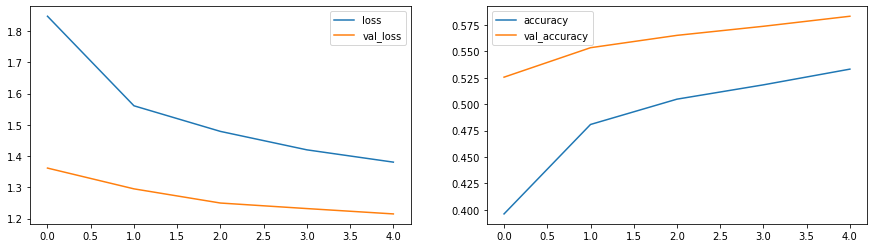

In [ ]:
def plot(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    axes[0].plot(history.history['loss'])   
    axes[0].plot(history.history['val_loss'])
    axes[0].legend(['loss','val_loss'])

    axes[1].plot(history.history['accuracy'])   
    axes[1].plot(history.history['val_accuracy'])
    axes[1].legend(['accuracy','val_accuracy'])

plot(history)